In [ ]:
pip install kaggle


In [ ]:
from google.colab import files

files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

face-mask-12k-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/face-mask-12k-images-dataset.zip

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
INPUT_SIZE = [128,128]
BATCH = 32
#im

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range = 0.2,
                                      )

training_data = training_datagen.flow_from_directory('/content/Face Mask Dataset/Train',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     class_mode = 'binary'
                                                     )

Found 10000 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = training_datagen.flow_from_directory('/content/Face Mask Dataset/Test',
                                                     target_size = INPUT_SIZE,
                                                     batch_size=BATCH,
                                                     class_mode = 'binary'
                                                     )

Found 992 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
vgg16 = VGG16(input_shape=INPUT_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

vgg16.summary()

In [ ]:
flatten = Flatten()(vgg16.output)
dense_1 = Dense(units=500, activation='relu')(flatten)
dense_2 = Dense(units=500, activation='relu')(dense_1)
dense_3 = Dense(units=100, activation='relu')(dense_2)
dense_4 = Dense(units=100, activation='relu')(dense_3)
dense_output = Dense(units=1, activation='sigmoid')(dense_4)



In [ ]:
model = Model(inputs=vgg16.input, outputs=dense_output)
model.summary()

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

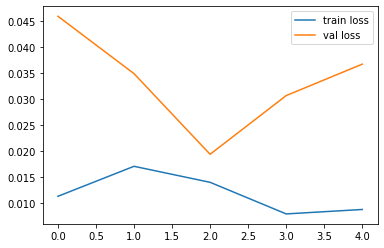

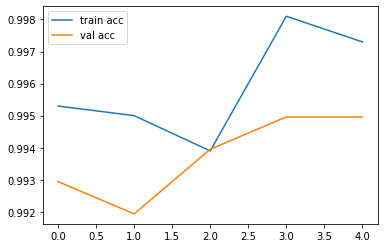

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
r = model.fit_generator(
  training_data,
  validation_data=test_data,
  epochs=5,
  steps_per_epoch=len(training_data),
  validation_steps=len(test_data)
)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/Face Mask Dataset/Validation/WithMask/1837.png', target_size = INPUT_SIZE)
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result[0][0]

1/1 [==============================] - 0s 17ms/step


1.1226332e-11

In [ ]:
if result[0][0] < 0.5:
    print('Image classified as WithMAsk')
else:
    print('Image classified as Without Mask')

In [ ]:
model.save('face_mask_vgg16.h5')
files.download('face_mask_vgg16.h5')